In [7]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
import requests
from PIL import Image
import cv2

np.random.seed(0)

In [15]:
# Import MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Checking to see if dataset imported correctly
# Assert checks condition in argument and return message if false
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

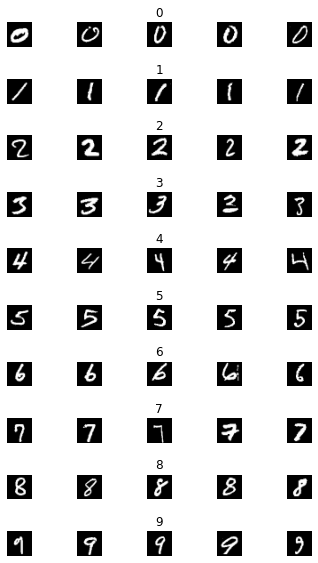

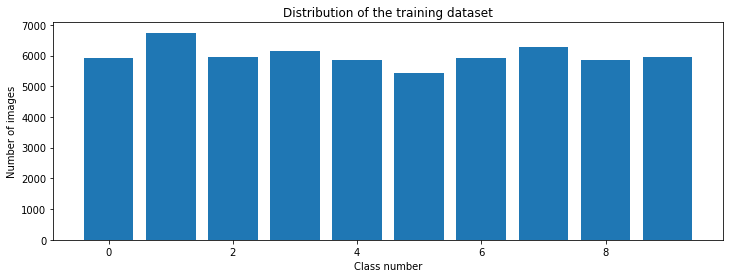

In [16]:
num_of_samples = []
 
cols = 5
num_classes = 10

# Create visualization of dataset 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        # Gets all data in training data with label of j
        x_selected = X_train[y_train == j]
        # Gets a random element to display
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

# Shows bargraph of training data set
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")


In [17]:
# One hot encoding 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Pixel values are from 0-255. Makes data shown as 0-1 instead
X_train = X_train/255 
X_test = X_test/255

# Flatten the image of 28x28 pixel into 784 pixel
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0.9242 - accuracy: 0.6940 - val_loss: 0.2810 - val_accuracy: 0.9135
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3272 - accuracy: 0.9016 - v

Text(0.5, 0, 'epoch')

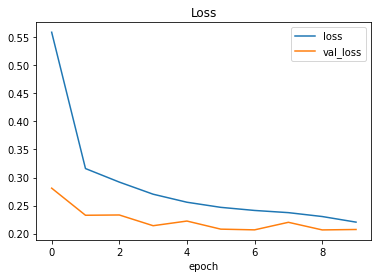

In [18]:
def create_model():
    model = Sequential()
    # Adding layers
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
model = create_model()
print(model.summary())
 
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 

<class 'list'>
Test score: 0.2443084418773651
Test accuracy: 0.9297999739646912


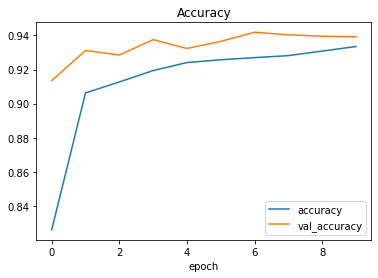

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
 
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predicted digit: [2]


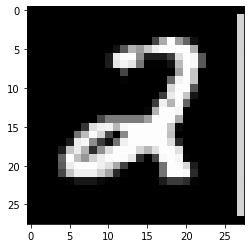

In [20]:
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
# Reshape image to be 28x28 and the correct color scheme
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

# Reshape data values and flatten
img = img/255
img = img.reshape(1, 784)
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))